In [11]:
import pandas as pd
import matplotlib as plt

Timestamp('2018-01-15 15:45:00')

In [2]:
#CONFIRMED
confirmed_df = pd.read_csv("Resources/time_series_19-covid-Confirmed.csv")
confirmed_df["Status"] = confirmed_df.loc[:,'Status'] = 'Confirmed'

#CREA UNA TABLA DE CASOS DIARIOS CONFIRMED
confirmedByday=confirmed_df.copy()
i=40
j=0
while (j<=104):
    while (i >=5):
        confirmedByday.iloc[j,i]=confirmedByday.iloc[j,i]-confirmedByday.iloc[j,i-1]
        i = i - 1
    j=j+1
    i=40


#MUERTES
deaths_df = pd.read_csv("Resources/time_series_19-covid-Deaths.csv")
deaths_df["Status"] = deaths_df.loc[:,'Status'] = 'Deaths'

#CREA UNA TABLA DE CASOS DIARIOS MUERTES
deathsByday=deaths_df.copy()
i=40
j=0
while (j<=104):
    while (i >=5):
        deathsByday.iloc[j,i]=deathsByday.iloc[j,i]-deathsByday.iloc[j,i-1]
        i = i - 1
    j=j+1
    i=40

    
#RECOVERED    
recovered_df = pd.read_csv("Resources/time_series_19-covid-Recovered.csv")
recovered_df["Status"] = recovered_df.loc[:,'Status'] = 'Recovered'
#CREA UNA TABLA DE CASOS RECUPERADOS
recoveredByday=recovered_df.copy()
i=40
j=0
while (j<=104):
    while (i >=5):
        recoveredByday.iloc[j,i]=recoveredByday.iloc[j,i]-recoveredByday.iloc[j,i-1]
        i = i - 1
    j=j+1
    i=40

## DATA ACUMULATIVAS
#  recovered_df
#  deaths_df
#  confirmed_df

## DATA DIARIAS
#  recoveredByday
#  deathsByday
#  confirmedByday

In [3]:
#Desde aquí se decide cuales df vamos a usar
combined_data = pd.concat([confirmedByday, deathsByday, recoveredByday])
combined_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,Status
0,Anhui,Mainland China,31.8257,117.2264,1,8,6,24,21,10,...,4,1,1,1,0,0,0,0,0,Confirmed
1,Beijing,Mainland China,40.1824,116.4142,14,8,14,5,27,12,...,6,2,1,3,0,0,1,0,10,Confirmed
2,Chongqing,Mainland China,30.0572,107.8740,6,3,18,30,18,35,...,5,7,5,1,2,1,0,0,0,Confirmed
3,Fujian,Mainland China,26.0789,117.9874,1,4,5,8,17,24,...,1,0,0,0,0,0,1,0,2,Confirmed
4,Gansu,Mainland China,36.0611,103.8343,0,2,0,2,3,7,...,0,0,0,0,0,0,0,0,0,Confirmed


In [24]:
transposed_df = combined_data.melt(['Province/State', 'Country/Region', 'Lat', 'Long', 'Status'], var_name='Original Date', value_name='Cases')
transposed_df.head()

,Province/State,Country/Region,Lat,Long,Status,Original Date,Cases
0,Anhui,Mainland China,31.8257,117.2264,Confirmed,1/22/20,1
1,Beijing,Mainland China,40.1824,116.4142,Confirmed,1/22/20,14
2,Chongqing,Mainland China,30.0572,107.8740,Confirmed,1/22/20,6
3,Fujian,Mainland China,26.0789,117.9874,Confirmed,1/22/20,1
4,Gansu,Mainland China,36.0611,103.8343,Confirmed,1/22/20,0


In [25]:
transposed_df['Date']  = pd.to_datetime(transposed_df['Original Date'])
transposed_df

,Province/State,Country/Region,Lat,Long,Status,Original Date,Cases,Date
0,Anhui,Mainland China,31.8257,117.2264,Confirmed,1/22/20,1,2020-01-22
1,Beijing,Mainland China,40.1824,116.4142,Confirmed,1/22/20,14,2020-01-22
2,Chongqing,Mainland China,30.0572,107.8740,Confirmed,1/22/20,6,2020-01-22
3,Fujian,Mainland China,26.0789,117.9874,Confirmed,1/22/20,1,2020-01-22
4,Gansu,Mainland China,36.0611,103.8343,Confirmed,1/22/20,0,2020-01-22
...,...,...,...,...,...,...,...,...
11650,NaN,Romania,45.9432,24.9668,Recovered,2/27/20,0,2020-02-27
11651,NaN,Denmark,56.2639,9.5018,Recovered,2/27/20,0,2020-02-27
11652,NaN,Estonia,58.5953,25.0136,Recovered,2/27/20,0,2020-02-27
11653,NaN,Netherlands,52.1326,5.2913,Recovered,2/27/20,0,2020-02-27


In [26]:
status_df = transposed_df.groupby(['Status','Date'])

cases = status_df['Cases'].sum()

status_summary = pd.DataFrame({"Cases": cases})
status_summary.sort_values('Date')
reset_status_summary = status_summary.reset_index()
reset_status_summary

,Status,Date,Cases
0,Confirmed,2020-01-22,555
1,Confirmed,2020-01-23,98
2,Confirmed,2020-01-24,288
3,Confirmed,2020-01-25,493
4,Confirmed,2020-01-26,684
...,...,...,...
106,Recovered,2020-02-23,508
107,Recovered,2020-02-24,1833
108,Recovered,2020-02-25,2678
109,Recovered,2020-02-26,2479


In [27]:
status_list = reset_status_summary.Status.unique()
status_list

array(['Confirmed', 'Deaths', 'Recovered'], dtype=object)

In [28]:
confirmed_summary = reset_status_summary.loc[:,'Status']['Confirmed']
confirmed_summary.Date.unique()


#p1 = plt.bar(x_axis, y_axis)
#confirmed_summary = status_summary.loc['Deaths']
#confirmed_summary.head()
#confirmed_summary.plot(kind='bar', stack = True)

KeyError: 'Confirmed'

Cases
Status    Date             
Confirmed 2020-01-22    555
          2020-01-23     98
          2020-01-24    288
          2020-01-25    493
          2020-01-26    684
...                     ...
Recovered 2020-02-23    508
          2020-02-24   1833
          2020-02-25   2678
          2020-02-26   2479
          2020-02-27   2893

[111 rows x 1 columns]

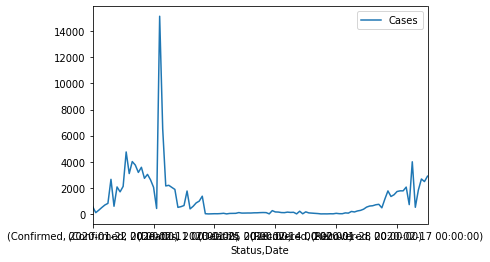

In [30]:
status_summary.plot(kind='line', stacked=True)
status_summary